# Daily electric production 

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px

In [15]:
data = pd.read_csv("C:\\Users\\USER\\OneDrive\\Desktop\\datasets\\Electric_Production.csv")


In [26]:

# data.set_index("DATE", inplace=True)

data.index = pd.to_datetime(data.index)

# Localize to UTC and convert to Africa/Kigali
data.index = data.index.tz_localize("UTC").tz_convert("Africa/Kigali")


data.head(10)

,IPG2211A2N
DATE,
1985-01-01 02:00:00+02:00,72.5052
1985-02-01 02:00:00+02:00,70.6720
1985-03-01 02:00:00+02:00,62.4502
1985-04-01 02:00:00+02:00,57.4714
1985-05-01 02:00:00+02:00,55.3151
1985-06-01 02:00:00+02:00,58.0904
1985-07-01 02:00:00+02:00,62.6202
1985-08-01 02:00:00+02:00,63.2485
1985-09-01 02:00:00+02:00,60.5846


<Axes: xlabel='DATE'>

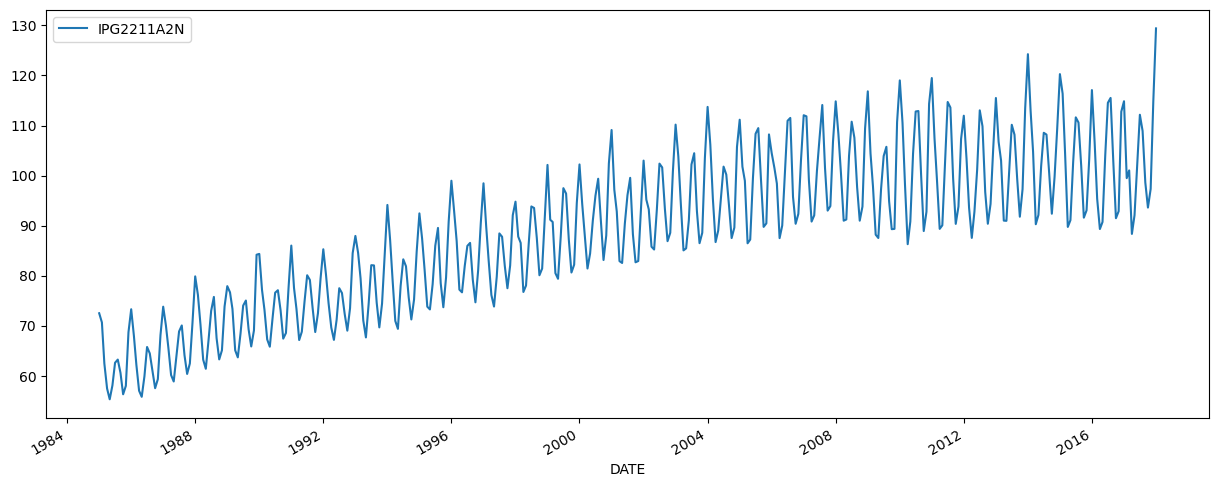

In [27]:
fig, ax= plt.subplots(figsize=(15,6))
data.plot(ax=ax)

In [30]:
data.shape

(397, 1)

<Axes: xlabel='DATE'>

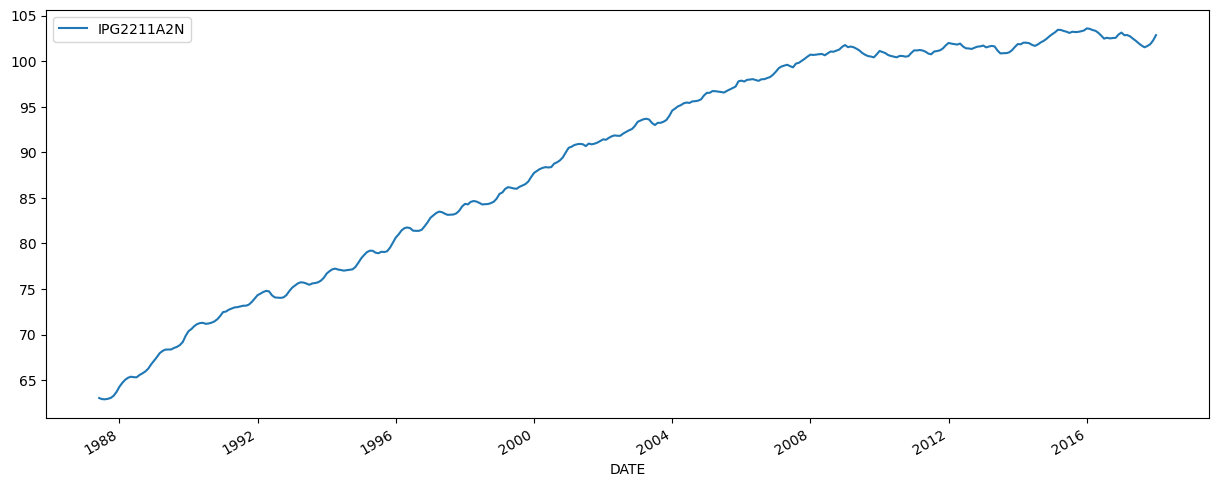

In [32]:
fig, ax = plt.subplots(figsize=(15,6))

data.rolling(30).mean().plot(ax=ax)


Text(0, 0.5, 'IPG2211A2N')

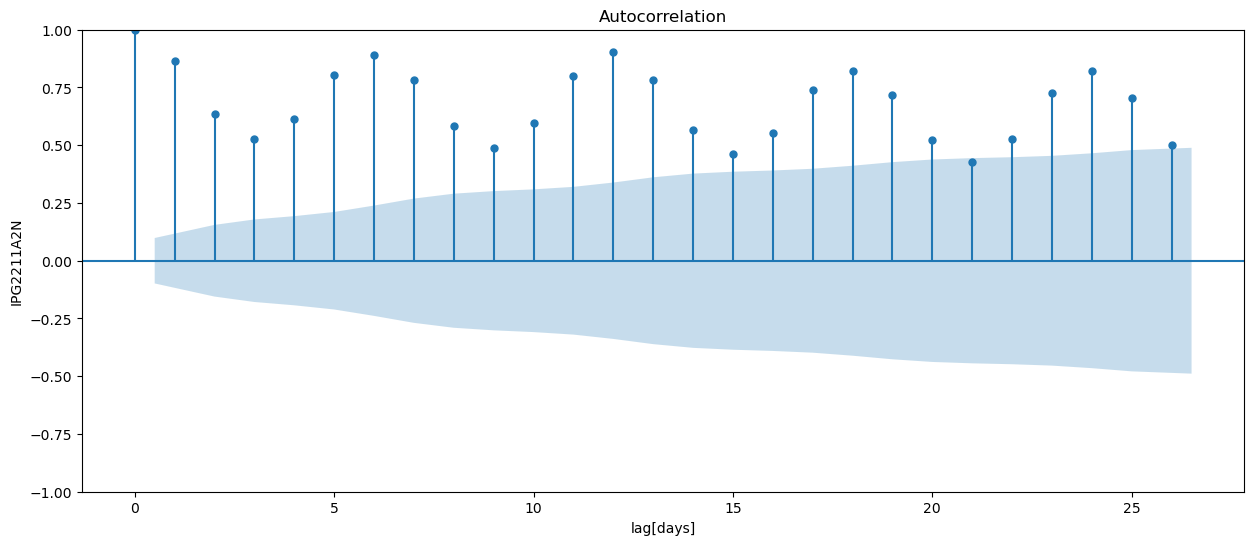

In [38]:
fig , ax =plt.subplots(figsize =(15,6))
plot_acf(data,ax=ax)
plt.xlabel("lag[days]")
plt.ylabel("IPG2211A2N")


Text(0, 0.5, 'IPG2211A2N')

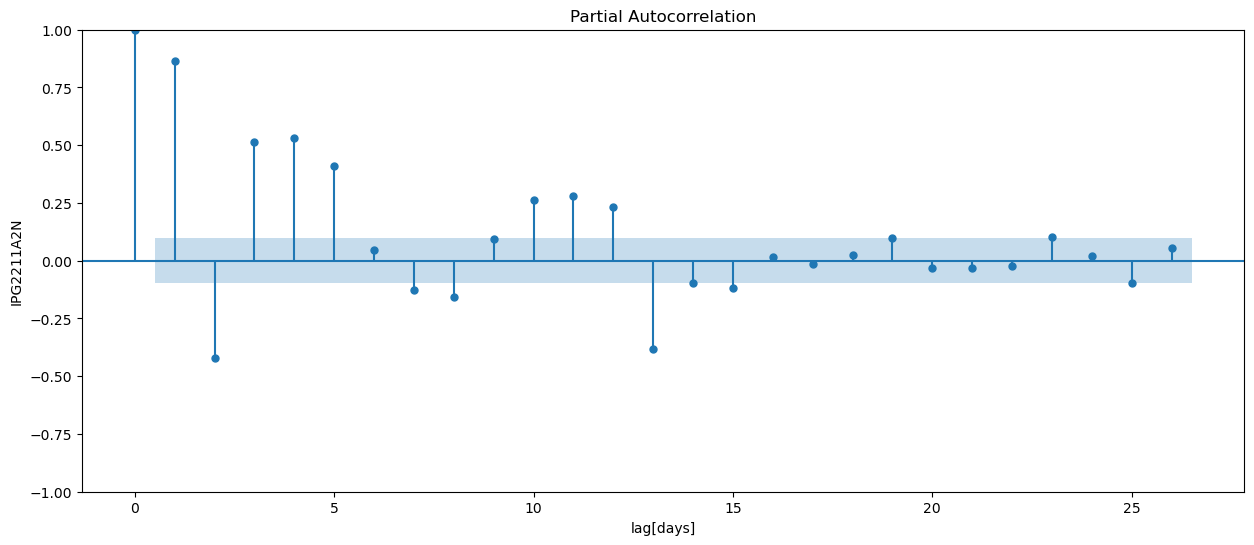

In [39]:
fig , ax =plt.subplots(figsize =(15,6))
plot_pacf(data,ax=ax)
plt.xlabel("lag[days]")
plt.ylabel("IPG2211A2N")

In [110]:
cut = int(len(data)*0.8)
y_train = data.iloc[:cut].squeeze()
y_test = data.iloc[cut:].squeeze()


In [43]:
len(y_train) + len(y_test) == len(data)

True

In [111]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train) 
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)

print (F"mean: {round(y_train_mean,2)}")
print(f"mae_baseline: {round(mae_baseline,2)}")
type(y_train)

mean: 85.35
mae_baseline: 12.04


pandas.core.series.Series

In [60]:
p_params = range (1,12,3)
q_params = range(0,3,1)

In [112]:
y_train.index = pd.to_datetime(y_train.index)

y_train.index.freq = "MS"

my_grid = dict()
for p in p_params:
    my_grid[p] = list()
    for q in q_params:
        order= (p,0,q)
        start_time = time.time()
        model = ARIMA(y_train,order=order).fit()
        elapsed_time = time.time() - start_time
        print(f"for the params {order}  in {elapsed_time} sec" )
        y_pred = model.predict()
        mae= mean_absolute_error(y_train, y_pred)
        my_grid[p].append(mae)
        
print()
print(my_grid )
        

for the params (1, 0, 0)  in 0.1461484432220459 sec
for the params (1, 0, 1)  in 0.2145984172821045 sec
for the params (1, 0, 2)  in 0.33974432945251465 sec
for the params (4, 0, 0)  in 0.23044204711914062 sec
for the params (4, 0, 1)  in 0.44916820526123047 sec


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


for the params (4, 0, 2)  in 0.6146011352539062 sec
for the params (7, 0, 0)  in 0.9814307689666748 sec
for the params (7, 0, 1)  in 0.9153447151184082 sec


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


for the params (7, 0, 2)  in 1.1444480419158936 sec


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


for the params (10, 0, 0)  in 1.5152182579040527 sec


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


for the params (10, 0, 1)  in 1.4665555953979492 sec
for the params (10, 0, 2)  in 1.6649587154388428 sec

{1: [5.955503182779534, 4.7423847621439545, 4.398427153524341], 4: [3.2180180807322203, 2.957469751055329, 2.955624836262274], 7: [2.9380316638537027, 2.9418420243056485, 2.5675351825052313], 10: [2.5651765990779953, 2.6800175866133573, 2.4330159098294435]}


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [113]:
 means = pd.DataFrame(my_grid)
means

,1,4,7,10
0,5.955503,3.218018,2.938032,2.565177
1,4.742385,2.957470,2.941842,2.680018
2,4.398427,2.955625,2.567535,2.433016


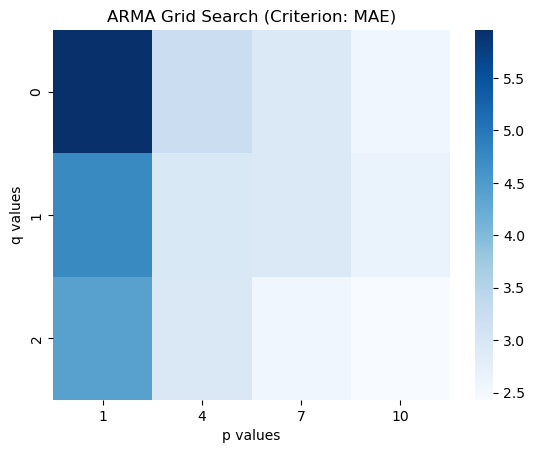

In [80]:
sns.heatmap(means, cmap="Blues")
plt.xlabel("p values")
plt.ylabel("q values")
plt.title("ARMA Grid Search (Criterion: MAE)");

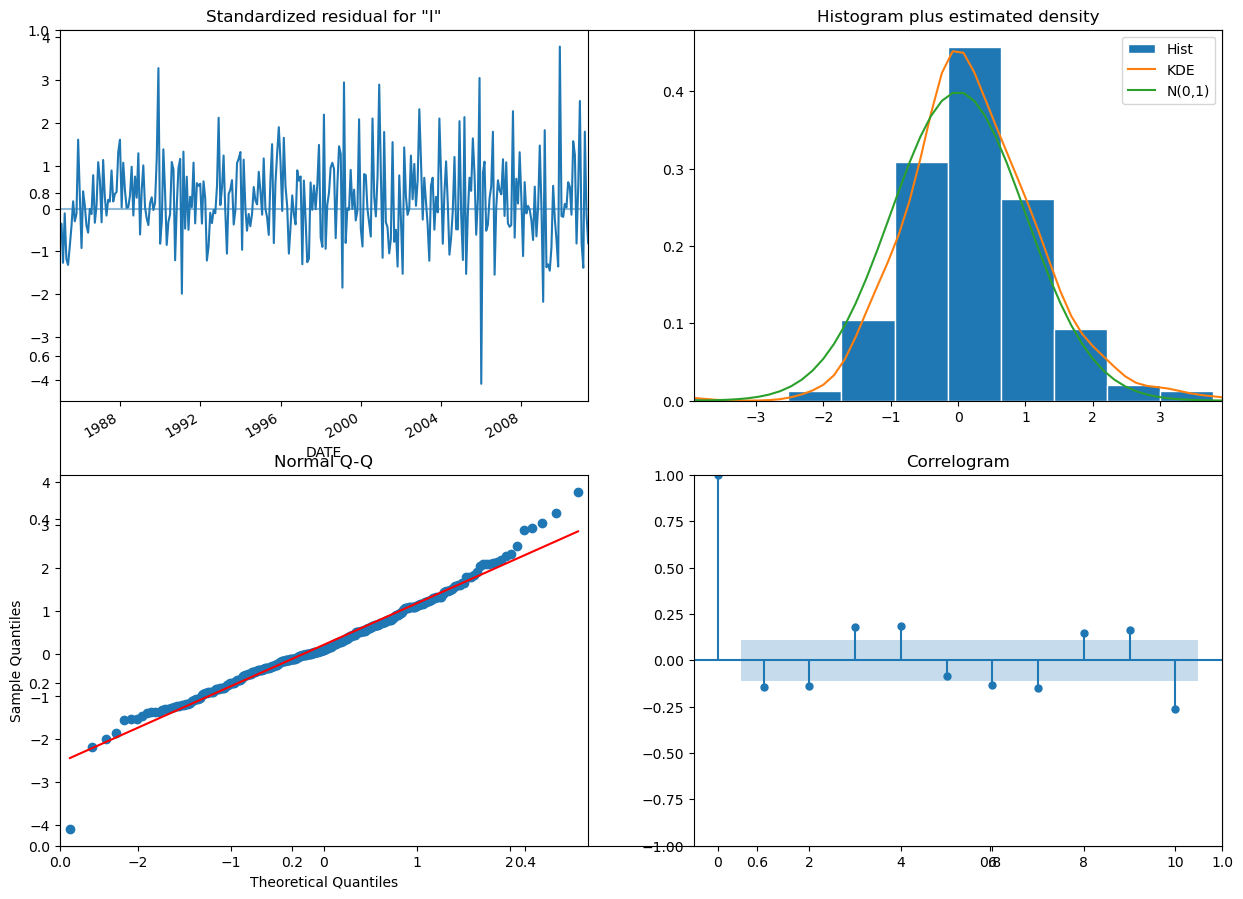

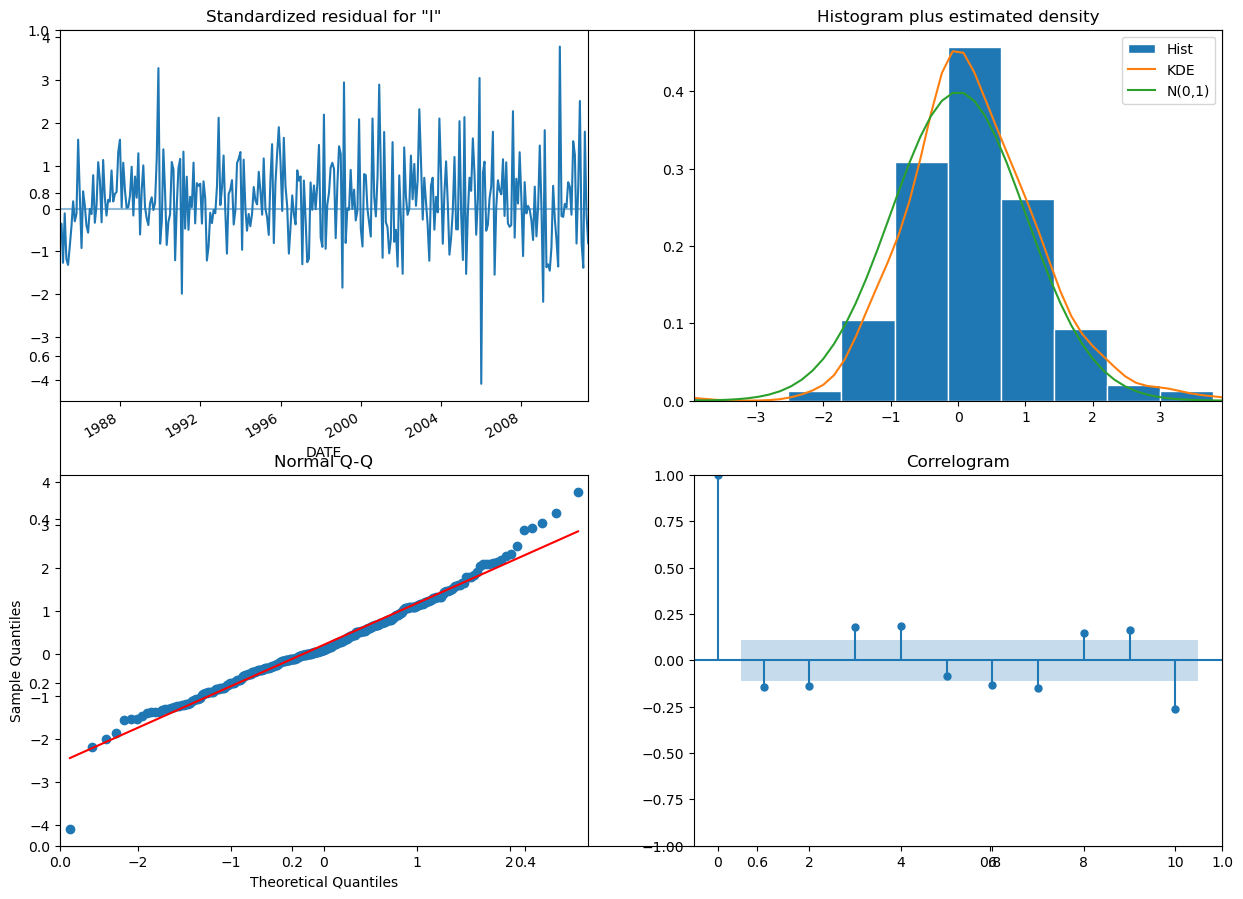

In [81]:
fig ,ax = plt.subplots(figsize=(15,12))
model.plot_diagnostics(fig=fig)

In [159]:
y_pred_wfv =pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    model = ARIMA(history, order=(8,0,1)).fit()
    next_pred = model.forecast()
    y_pred_wfv = pd.concat([y_pred_wfv, pd.Series(next_pred)], ignore_index=False)
    history = pd.concat([history, y_test.loc[next_pred.index]])


C:\Users\USER\AppData\Local\Temp\ipykernel_10236\1639163338.py:6: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users

In [160]:
y_pred_wfv

2011-06-01 02:00:00+02:00    103.962145
2011-07-01 02:00:00+02:00    112.025164
2011-08-01 02:00:00+02:00    110.569815
2011-09-01 02:00:00+02:00    100.426786
2011-10-01 02:00:00+02:00     89.831300
                                ...    
2017-09-01 02:00:00+02:00     97.114532
2017-10-01 02:00:00+02:00     92.741877
2017-11-01 02:00:00+02:00     93.752984
2017-12-01 02:00:00+02:00    106.138519
2018-01-01 02:00:00+02:00    119.342569
Freq: MS, Length: 80, dtype: float64

In [117]:
y_pred_wfv[:5]

0    103.962145
1    112.025164
2    110.569815
3    100.426786
4     89.831300
dtype: float64

In [161]:
mae = mean_absolute_error(y_test,y_pred_wfv)
mae

3.4095520886311887

In [163]:
df_predictions = pd.DataFrame({"y_test": y_test, "y_pred_wfv":y_pred_wfv})
fig = px.line(df_predictions, labels={"value": "IPG2211A2N"})

fig.show()

C:\Users\USER\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

